# MLND CAPSTONE PROJECT

**Project Summary:**  

In this project, we will train a model that can decode sequences of digits from natural images, and create an app that prints the numbers it sees in real time using Tensorflow library.

The data that we will be using is Street View House Numbers (SVHN), a large-scale dataset of house numbers in Google Street View images.

## Get training and test data

In [11]:
# Import required modules
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
import tensorflow as tf

from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

In [12]:
# Download SVHN data from Stanford University repo
from urllib import urlretrieve
    
url = 'http://ufldl.stanford.edu/housenumbers/'

def maybe_download(filename, force=False):
  """Download a file if not present, and make sure it's the right size."""
  if force or not os.path.exists(filename):
    print('Attempting to download:', filename)
    filename, _ = urlretrieve(url + filename, filename)
    print('Found and downloaded', filename)
  statinfo = os.stat(filename)
  return filename

In [13]:
# Download train, test and extra files for full numbers
train_filename = maybe_download('train.tar.gz')
test_filename = maybe_download('test.tar.gz')

Attempting to download: train.tar.gz
Found and downloaded train.tar.gz
Attempting to download: test.tar.gz
Found and downloaded test.tar.gz


In [22]:
# file extraction

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
    print("Extraction completed.")
  
train_file = maybe_extract(train_filename)
test_file = maybe_extract(test_filename)

train already present - Skipping extraction of train.tar.gz.
test already present - Skipping extraction of test.tar.gz.


Showing a random image from training data:  14117.png


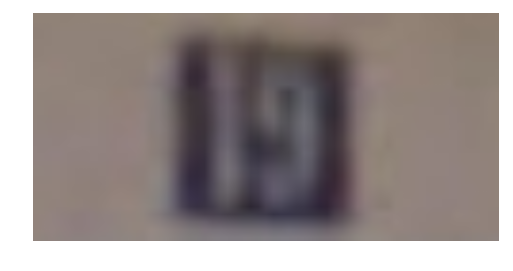

In [77]:
# show a random image from training data
import random
import matplotlib.image as mpimg
%matplotlib inline

start_path = "./train"

for path,dirs,files in os.walk(start_path):
    image_sample = random.sample(files, 1)
    for image in image_sample:
        print("Showing a random image from training data: ", image)
        im = mpimg.imread(('{0}/{1}').format(start_path, image))
        plt.axis("off")
        plt.imshow(im)
        plt.show()

## Pre-processing data